# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
np.random.seed(0)
X = np.r_[np.random.randn(70, 2) - [2, 2], 
          np.random.randn(70, 2) + [2, 2]]
Y = [0] * 70 + [1] * 70

#Se estima el modelo
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

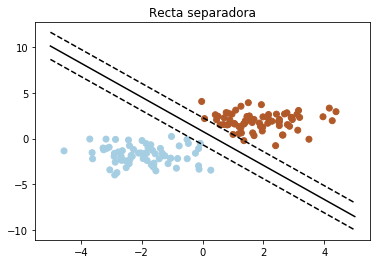

In [2]:
#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], 
            c=Y, cmap=plt.cm.Paired)

plt.title('Recta separadora')
plt.axis('tight')
plt.show()

# Ejemplos SVM: máximo margen de separación del hiperplano

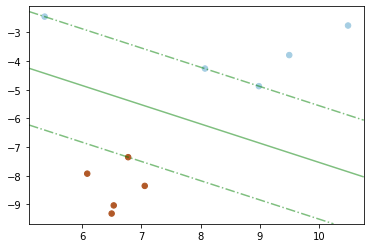

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
# creamos 100 puntos
X, y = make_blobs(n_samples=10, centers=2, random_state=6)
#ajusta el modelo
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plotea la decision funcion
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# crea la malla para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plotea decision margenes y fronteras
ax.contour(XX, 
           YY, 
           Z, 
           colors='g', 
           levels=[-1, 0, 1], 
           alpha=0.5, 
           linestyles=['-.', '-', '-.'])
# plotea support vectors
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1],
           s=100, linewidth=1, 
           facecolors='none')
plt.show()